# EDA and Visualization:
Some Simple Analysis and Visualization Done on the Dataset. The Functions allow comparison of Country Wise growth to the Logistic curve commonly seen for epidemics. 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
np.set_printoptions(threshold=sys.maxsize)

In [2]:
path_train = 'covid19-global-forecasting-week-2/train.csv'
path_test = 'covid19-global-forecasting-week-2/test.csv'
path_sbumit = 'covid19-global-forecasting-week-2/submission.csv'

train_kaggle = '/kaggle/input/covid19-global-forecasting-week-2/train.csv'
test_kaggle = '/kaggle/input/covid19-global-forecasting-week-2/test.csv'
submit_kaggle = '/kaggle/input/covid19-global-forecasting-week-2/submission.csv'

df_train = pd.read_csv(train_kaggle)
df_test = pd.read_csv(test_kaggle)
submission = pd.read_csv(submit_kaggle)

In [3]:
df_train.rename(columns = {'Country_Region': 'Country/Region', 'Province_State':'Province/State'}, inplace = True)

In [4]:
df_test.rename(columns = {'Country_Region': 'Country/Region', 'Province_State':'Province/State'}, inplace = True)

In [5]:
# Dataset Dimesnions
print('Train shape', df_train.shape)
print('Test shape', df_test.shape)
# Missing/Null Values
print('\nTrain Missing\n', df_train.isnull().sum())
print('\nTest Missing\n', df_test.isnull().sum())

Train shape (18816, 6)
Test shape (12642, 4)

Train Missing
 Id                    0
Country/Region        0
Province/State    10816
Date                  0
ConfirmedCases        0
Fatalities            0
dtype: int64

Test Missing
 ForecastId           0
Country/Region       0
Province/State    7267
Date                 0
dtype: int64


In [6]:
lst = df_train['Country/Region'].unique()
#print('Total_Countries\n:', len(lst))
#for i in lst:
#    print(i)

### Date Range for the Dataset 

In [7]:
print(df_train['Date'].min(), ' - ', df_train['Date'].max())

2020-01-22  -  2020-03-25


### Checking Daily Worldwide Confirmed Cases and Fatalities 

In [8]:
# GroupBy syntax (columns to group by in list)[Columns to aggregate, apply function to] . aggregation functions on it 
train_cases_conf = df_train.groupby(['Date'])['ConfirmedCases'].sum()
#train_cases_conf

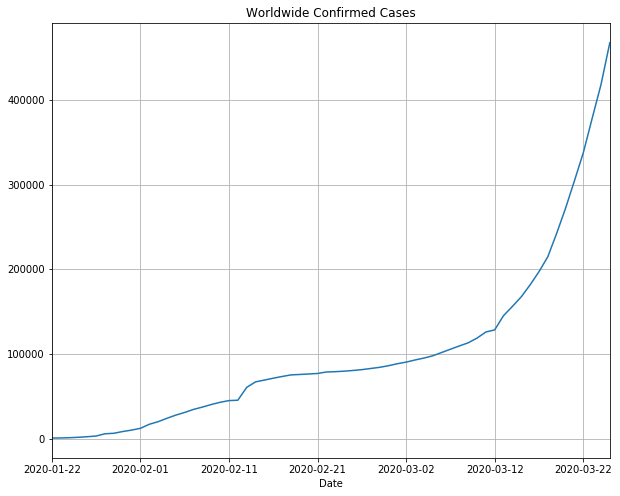

In [9]:
train_cases_conf.plot(figsize = (10,8), title = 'Worldwide Confirmed Cases', grid = True)

#### Worldwide Confirmedcases On Log axis

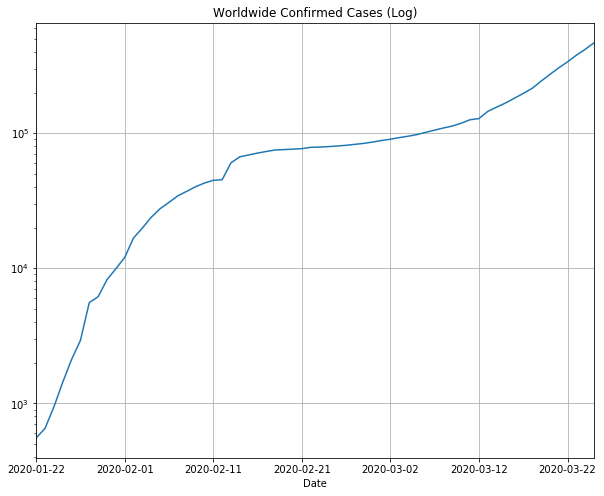

In [10]:
train_cases_conf.plot(figsize = (10,8), title = 'Worldwide Confirmed Cases (Log)', grid = True, logy = True)

In [11]:
train_fatal = df_train.groupby(['Date'])['Fatalities'].sum()
#train_fatal

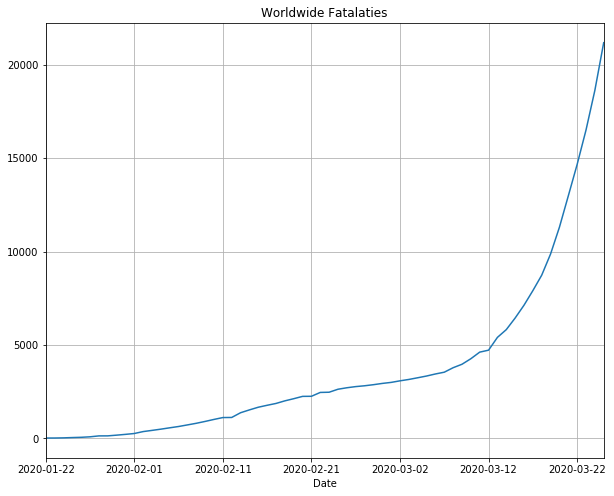

In [12]:
train_fatal.plot(figsize = (10,8), title = 'Worldwide Fatalaties', grid = True)

### Check Confirmed cases and fatalities for a 'Country' or 'World'

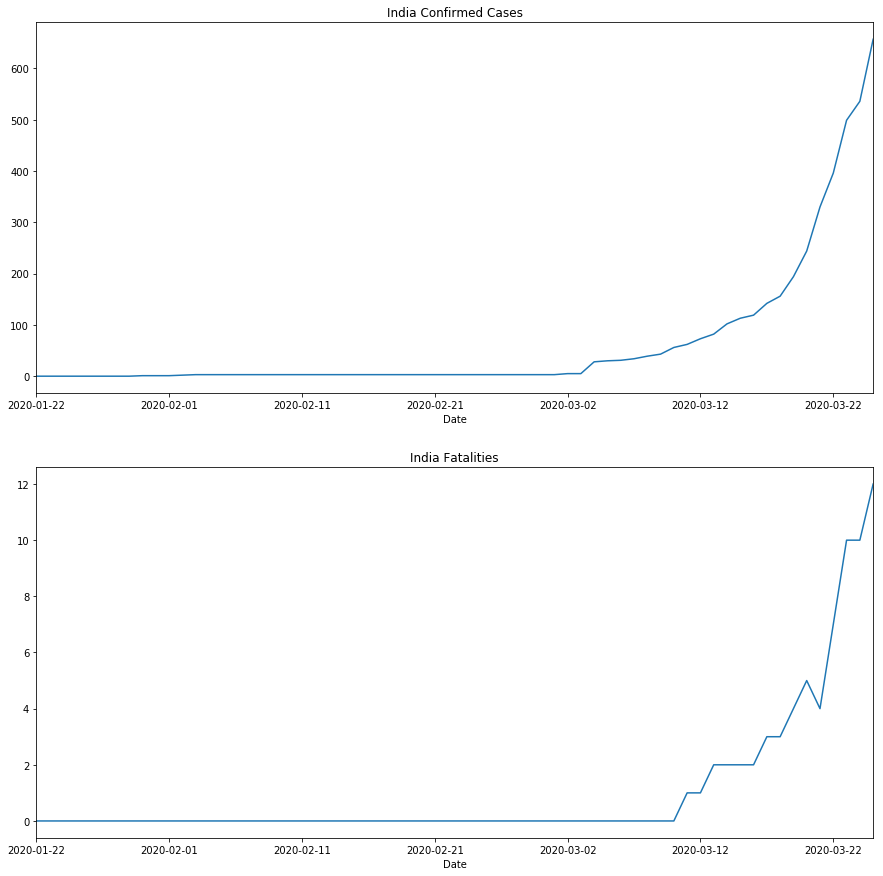

In [13]:
# To DO :
# 1. Add option to check for World or Country (Done)
# 2. Add toggle for scale = "linear", "log"
# 3. Check if country is present in Dataset, else throw error.

def country_stats(country, df):
    if country != 'World':
        country_filt = (df['Country/Region'] == country)
        df_cases = df.loc[country_filt].groupby(['Date'])['ConfirmedCases'].sum()
        df_fatal = df.loc[country_filt].groupby(['Date'])['Fatalities'].sum()
    else:
        df_cases = df.groupby(['Date'])['ConfirmedCases'].sum()
        df_fatal = df.groupby(['Date'])['Fatalities'].sum()
        
    fig, axes = plt.subplots(nrows = 2, ncols= 1, figsize=(15,15))
    axes[0].set_title(country + ' Confirmed Cases')
    axes[1].set_title(country + ' Fatalities')
    df_cases.plot(ax = axes[0])
    df_fatal.plot(ax = axes[1])
    
country_stats('India', df_train)

#### Fatalities and Confirmed Cases by Country (Log Scale)
We can observe how different countries are testing:
1. Countries like Iran have both the curves starting off very close, indicating they only started testing when people were dying/near death.
2. Looking at the sharp initial increase in cases for countries like US shows that widespread testing perhaps started too late.

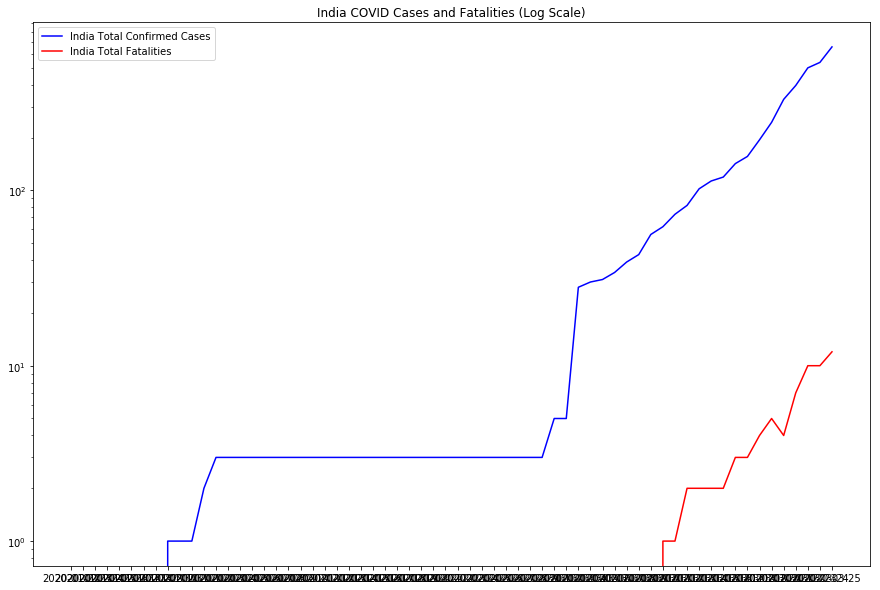

In [14]:
# grouping using same Country filter to get fatalities on each date (grouped by date)
# groupby([list of columns to groupby]) [which columns to apply aggregate fx to ]. (aggregate function)
# To Do - Fix Ticks 

def country_stats_log(country, df):
    count_filt =(df_train['Country/Region'] == country)
    df_count_case = df_train.loc[count_filt].groupby(['Date'])['ConfirmedCases'].sum()
    df_count_fatal = df_train.loc[count_filt].groupby(['Date'])['Fatalities'].sum()
    plt.figure(figsize=(15,10))
    plt.axes(yscale = 'log')
    plt.plot(df_count_case.index, df_count_case.tolist(), 'b', label = country +' Total Confirmed Cases')
    plt.plot(df_count_fatal.index, df_count_fatal.tolist(), 'r', label = country +' Total Fatalities')
    plt.title(country +' COVID Cases and Fatalities (Log Scale)')
    plt.legend()
    

country_stats_log('India', df_train)

###  Most Affected Countries 


#### No. of cumulative cases till a Particular Day

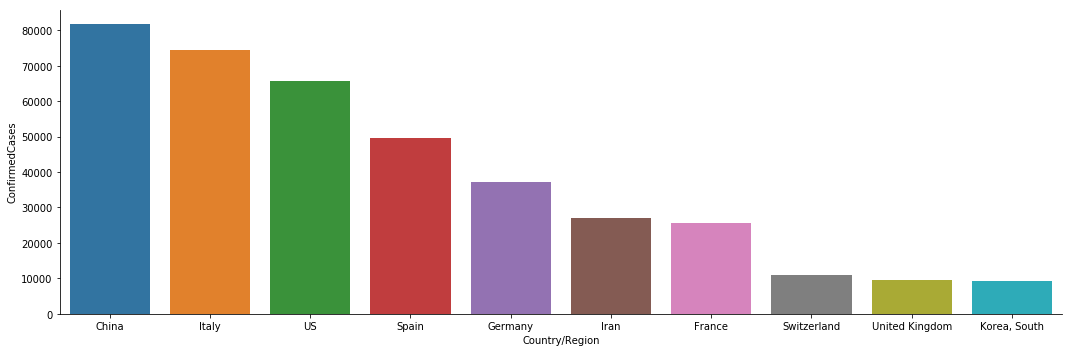

In [15]:
# as_index = False to not make the grouping column the index, creates a df here instead of series, preserves
# Confirmedcases column

# Confirmed Cases till a particular day by country

def case_day_country (Date, df):
    df = df.groupby(['Country/Region', 'Date'], as_index = False)['ConfirmedCases'].sum()
    date_filter = (df['Date'] == Date)
    df = df.loc[date_filter]
    df.sort_values('ConfirmedCases', ascending = False, inplace = True)
    sns.catplot(x = 'Country/Region', y = 'ConfirmedCases' , data = df.head(10), height=5,aspect=3, kind = 'bar')
    
    
case_day_country('2020-03-25', df_train)

### Change in Cases for a day. (Top 10)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


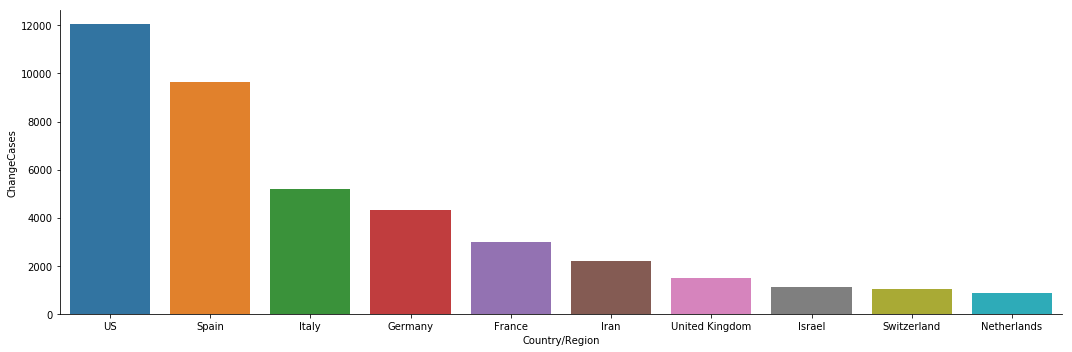

In [16]:
def case_country_diff (Date, df):
    
    df = df.groupby(['Country/Region', 'Date'], as_index = False)['ConfirmedCases'].sum()
    
    # Creating the two filter for date + dateoffset(1)
    date_filter = (df['Date'] == Date)
    # Getting filter for previous day 
    arr_date = Date.split('-')
    arr_date[2] = str(int(arr_date[2]) - 1) 
    new_date = '-'.join(arr_date)
    date_filter_2 = (df['Date'] == new_date)
    
    # Creating the two dataframes for the dates
    # Have to reset index, groupby screwed them up.
    df_1 = df.loc[date_filter]
    df_1.reset_index(drop= True, inplace = True)
    df_2 = df.loc[date_filter_2]
    df_2.reset_index(drop= True, inplace = True)
    
    # Getting change in Cases 
    df_1['ChangeCases'] = df_1['ConfirmedCases'] - df_2['ConfirmedCases']
    df_1.sort_values('ChangeCases', ascending = False, inplace = True)
    sns.catplot(x = 'Country/Region', y = 'ChangeCases' , data = df_1.head(10), height=5,aspect=3, kind = 'bar')


case_country_diff('2020-03-25', df_train)

# Logistic Curve or Sigmoid/ S- shaped Curve : Comparing Epidemic Behaviour
<p>From 3blue1brown video, most epidemics follow a logistic curve. The no. of infected rises exponentially and reaches an inflection point before steeply decreasing. This can be somewhat seen in China's Confirmed Cases plot.</p>
![Image of Sigmoid](https://wikimedia.org/api/rest_v1/media/math/render/svg/9e26947596d387d045be3baeb72c11270a065665)
Here x0 = the x value of the sigmoids midpoint. <br>
L = the curve's maximum value. <br>
k = the logistic growth rate or steepness of the curve.

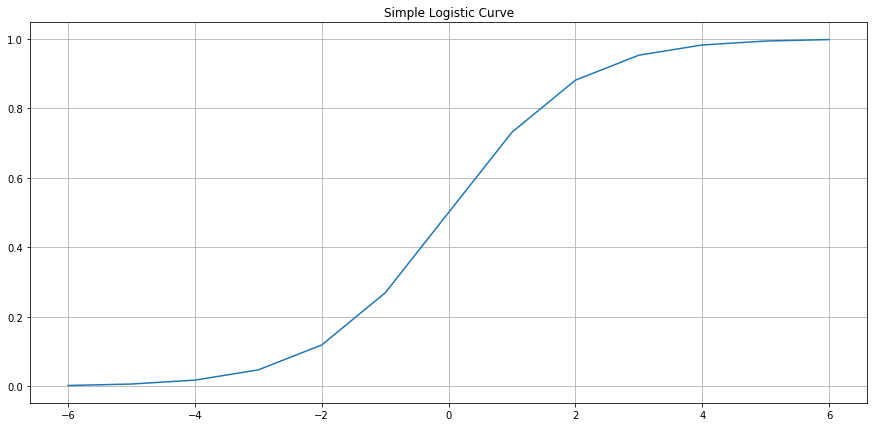

In [17]:
# Plotting a simple logistic curve using numpy and matplotlib.
# x = (-6,6), L =1, k = 1, x0 =0



x = np.arange(-6,7)
power = -1*x
y = 1 / (1 + np.exp(power))

plt.figure(figsize=(15,7))
plt.title('Simple Logistic Curve')
plt.grid(True)
plt.plot(x, y)
plt.show()

#### Compare Growth of Covid19 Cases and Fatalitis to Logistic Curve
<p>As we can see China's growth curve resembles the logistic function, many other countries have not hit the inflection point.</p>

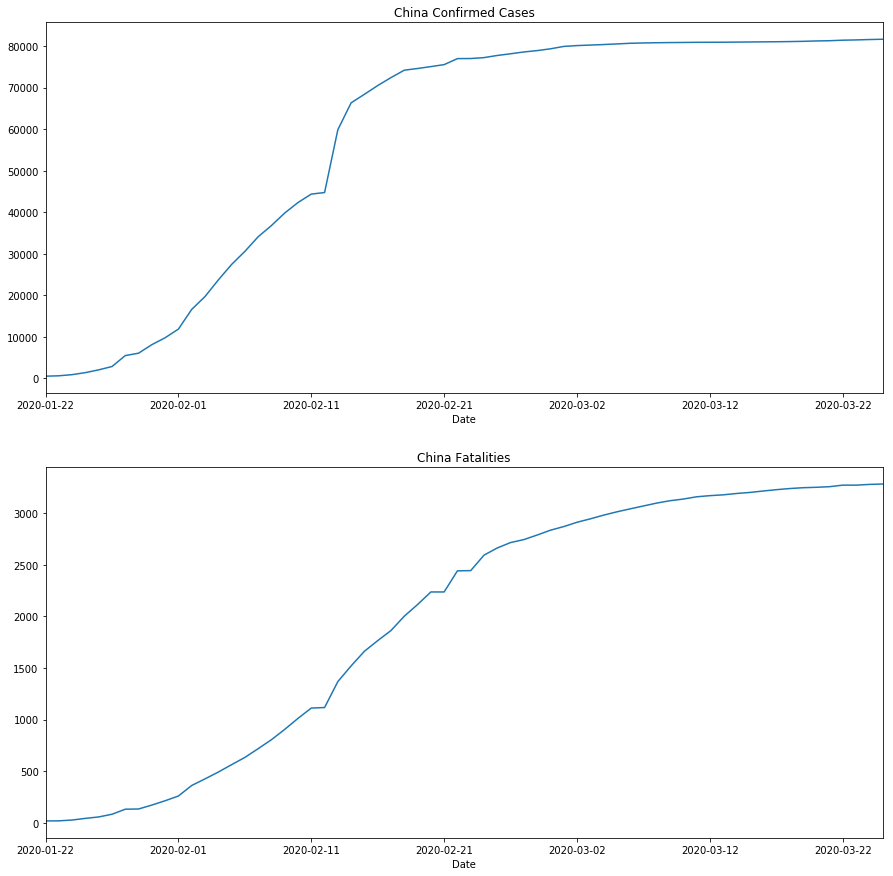

In [18]:
country_stats('China', df_train)

### Growth Factor
<p> The growth factor is the ratio between the number of cases on one day and the number of cases the precious day. 
    Measure of whether the disease is growing or not. 
    1. A value of greater than 1 = growth. 
    2. Less than 1 = decline. 
    3. A growth factor of 1 is the inflection point and at this point the disease is not increasing.
It can be seen that the disease hasn't stabilised at the inflection point.

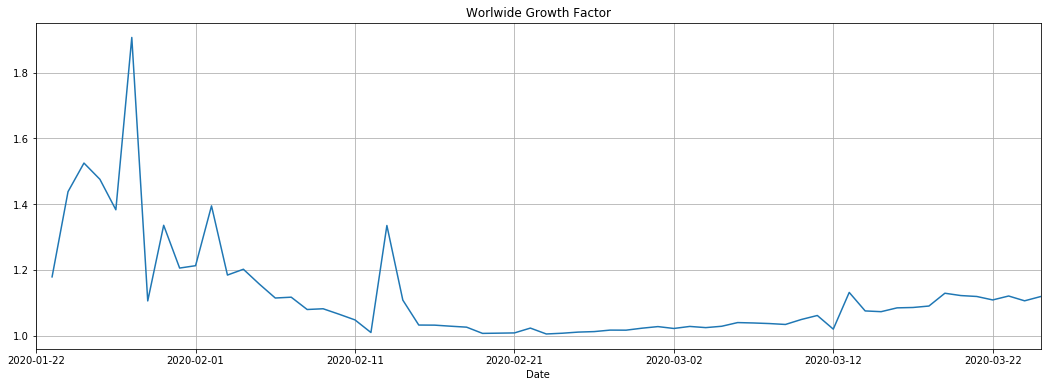

In [19]:
# pandas df.shift to shift dataframe

# Getting Worldwide Growth Factor
# GF = cases on date/ cases on day -1

growth_factor = train_cases_conf/train_cases_conf.shift(1)
growth_factor.plot(grid = True, title = 'Worlwide Growth Factor', figsize = (18,6))